### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Load and explore the data

In [2]:
df = pd.read_csv('WomensClothingReviews.csv')

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.shape

(23486, 11)

There are 11 features and 23486 reviews.

In [5]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


## Data Cleaning and Preprocessing

### Drop unnecessary columns for analysis

In [7]:
df.drop(['Unnamed: 0', 'Clothing ID'], axis = 1, inplace = True)

In [8]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Handling null/missing values

In [9]:
df.isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

The <b>Title</b> and <b>Review Text</b> columns contain a substantial amount of missing data. Given that both columns contribute to the review context, we will combine them to a new column. Other rows with the missing values will be simply removed.

Text(0.5, 1.0, 'Distribution of Missing Value (Before)')

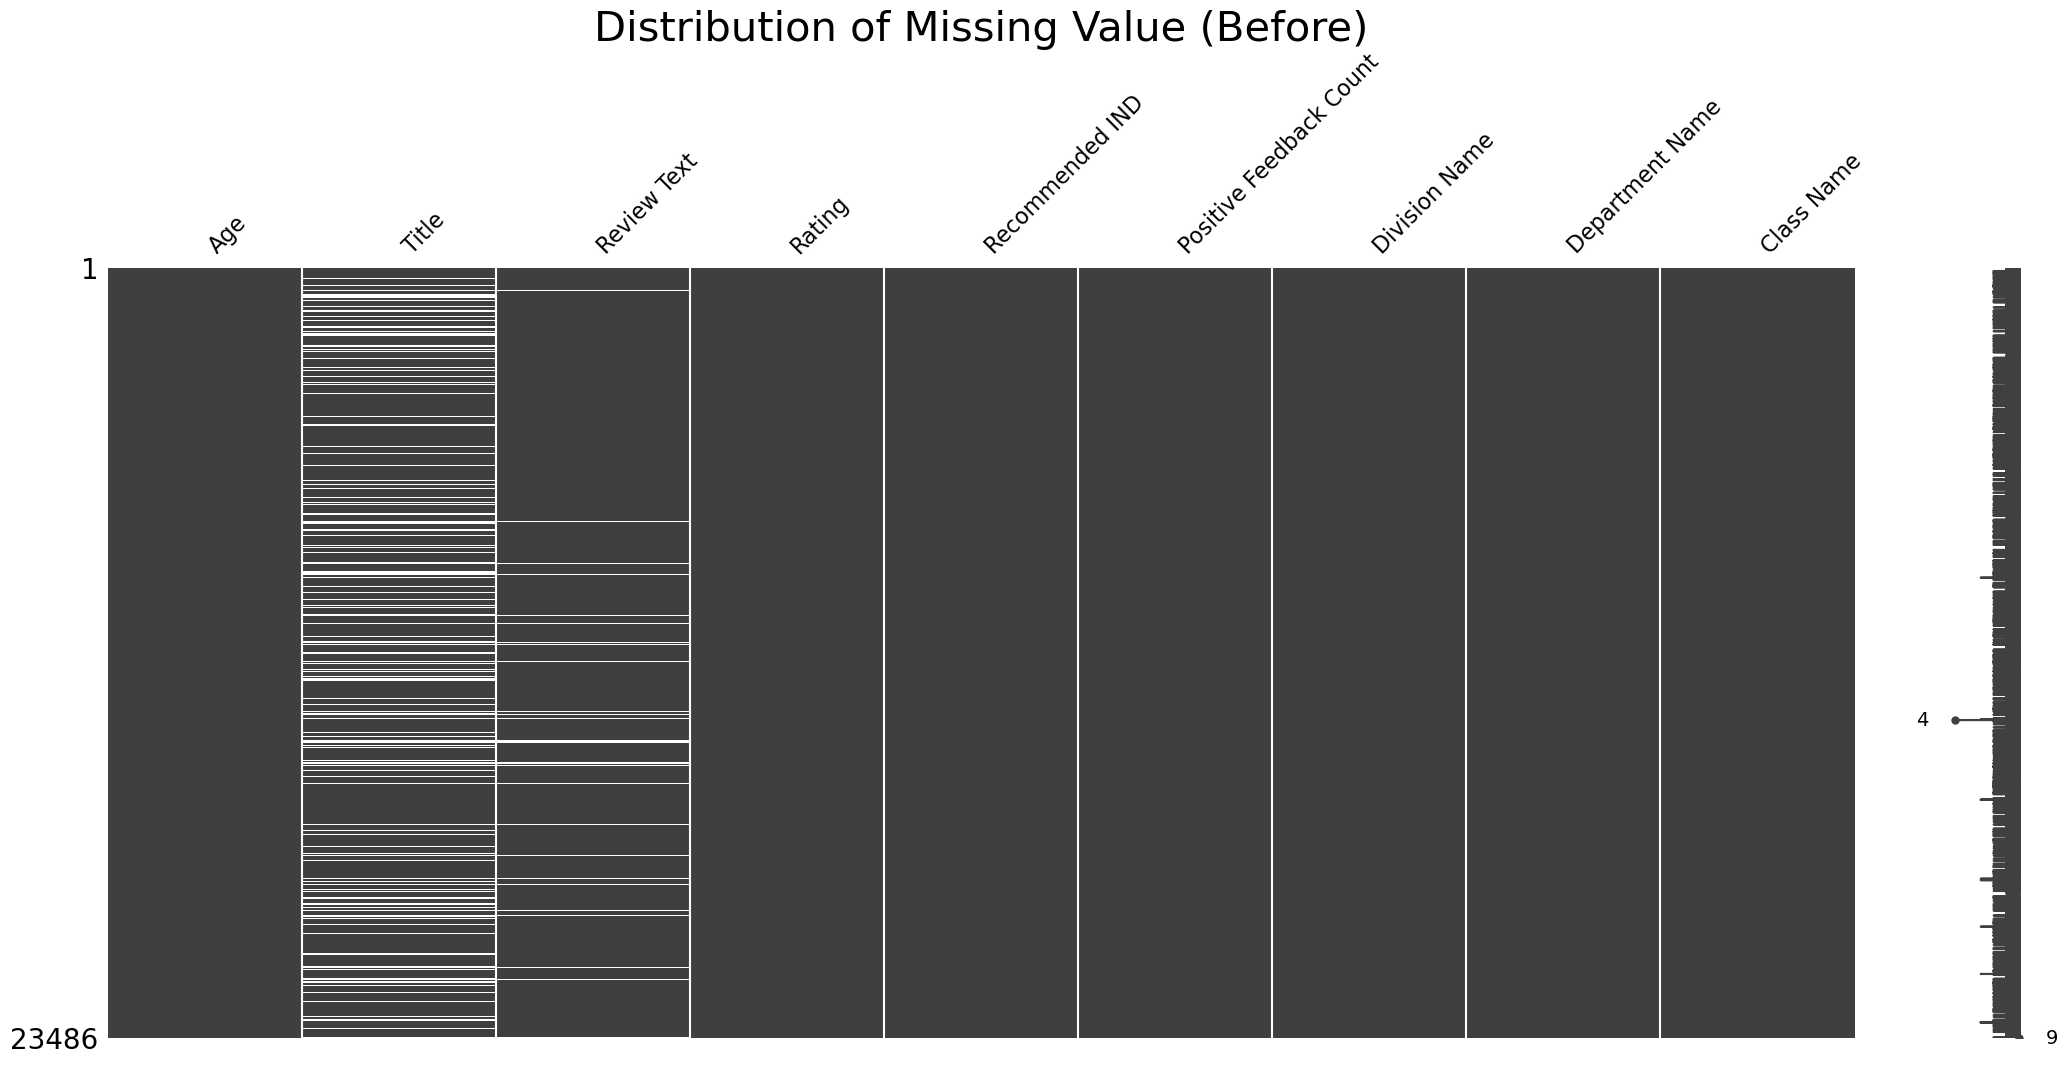

In [10]:
msno.matrix(df).set_title('Distribution of Missing Value (Before)',fontsize=30)

In [11]:
df = df.dropna(subset=['Division Name', 'Department Name', 'Class Name'])

In [12]:
df.isnull().sum()

Age                           0
Title                      3809
Review Text                 844
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [13]:
# Replace NaN values with blank space in "Title" and "Review Text" columns
df['Title'].fillna('', inplace=True)
df['Review Text'].fillna('', inplace=True)

# Combine "Title" and "Review Text" columns into a new column 'Review'
df.loc[:, 'Review'] = df['Title'] + ' ' + df['Review Text']

# Remove the 'Title' and 'Review Text' columns
df.drop(['Title', 'Review Text'], axis=1, inplace=True)

In [14]:
# Count the number of rows with only blank spaces in the "Review" column
num_blank_space_rows = (df['Review'].str.strip() == '').sum()

print("Number of rows with only blank spaces in the 'Review' column:", num_blank_space_rows)

Number of rows with only blank spaces in the 'Review' column: 843


In [15]:
# Filter rows with only blank spaces in the "Review" column
df = df[df['Review'].str.strip() != '']

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

In [16]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...
1,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...
2,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [17]:
df.shape

(22629, 8)

After cleaning the dataset, we have 8 columns and 22629 datapoints.

Text(0.5, 1.0, 'Distribution of Missing Value (After)')

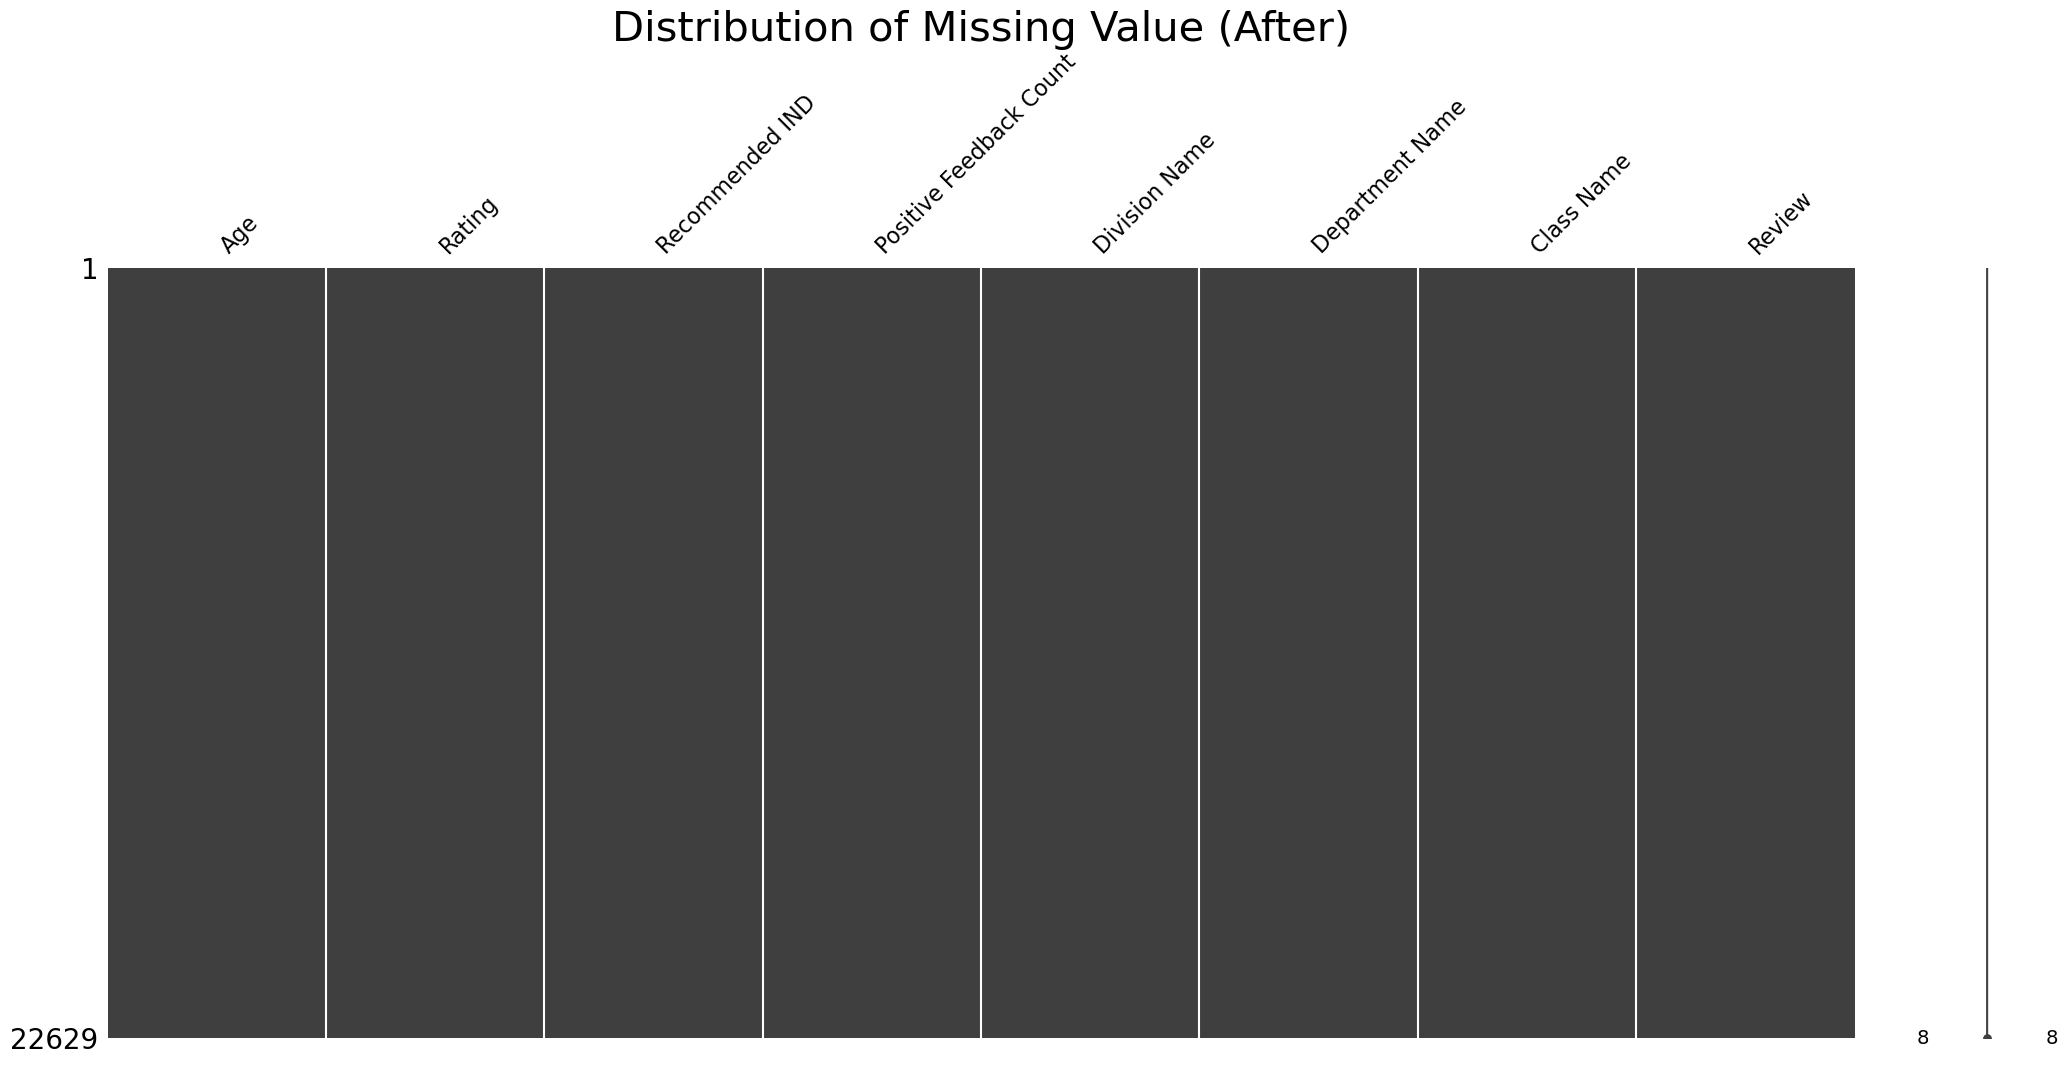

In [18]:
msno.matrix(df).set_title('Distribution of Missing Value (After)',fontsize=30)

#### Exploring the Review column

In [19]:
pd.set_option('display.max_colwidth', None)

df['Review'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                                                 Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  woul

## Exploratory Data Analysis

###  Exploring Product Recommendations and Feedback
"Recommended IND" is a column with binary outcome where the product recommended by customer is denoted by 1 and 0 if not recommended.

In [20]:
recommendation_counts = df['Recommended IND'].value_counts()
recommendation_counts

Recommended IND
1    18528
0     4101
Name: count, dtype: int64

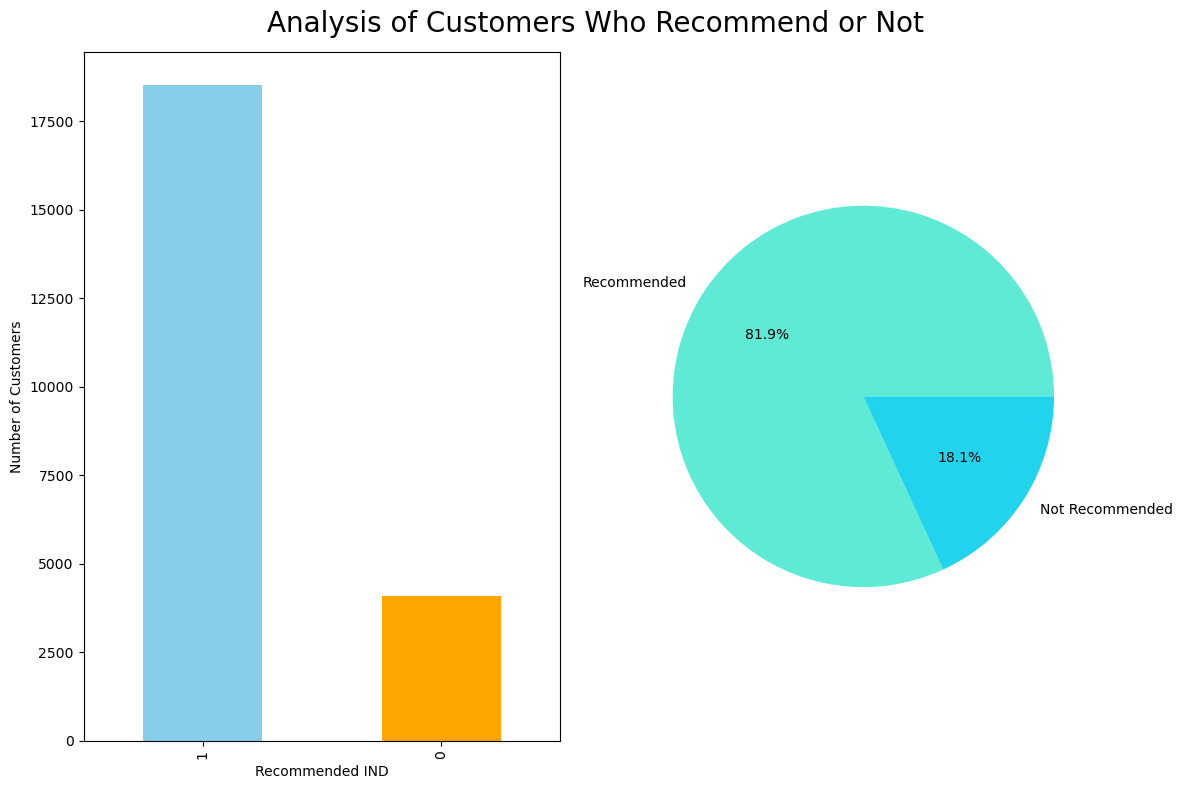

In [21]:
plt.figure(figsize=(12, 8))

# Create bar plot
plt.subplot(1, 2, 1)
recommendation_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.ylabel('Number of Customers')

# Create pie chart
plt.subplot(1, 2, 2)
plt.pie(recommendation_counts, labels=['Recommended', 'Not Recommended'], autopct='%1.1f%%', colors=['#5eead4', '#22d3ee'])

plt.suptitle('Analysis of Customers Who Recommend or Not', fontsize = 20)

plt.tight_layout()

plt.show()

The majority of customers recommend the products to others.

### Age Distribution

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


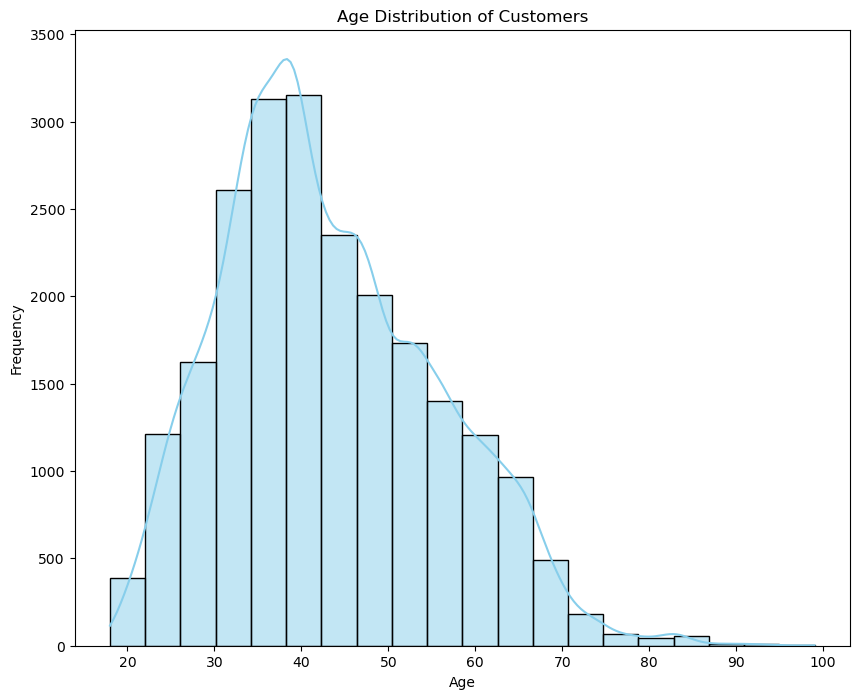

In [22]:
plt.figure(figsize=(10,8))
sns.histplot(df['Age'], bins=20, color='skyblue', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Customers')
plt.show()

In [23]:
df['Age'].describe()

count    22629.000000
mean        43.282293
std         12.328220
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

### Distribution of Ratings

In [24]:
rating_counts = df['Rating'].value_counts()
rating_counts

Rating
5    12528
4     4908
3     2823
2     1549
1      821
Name: count, dtype: int64

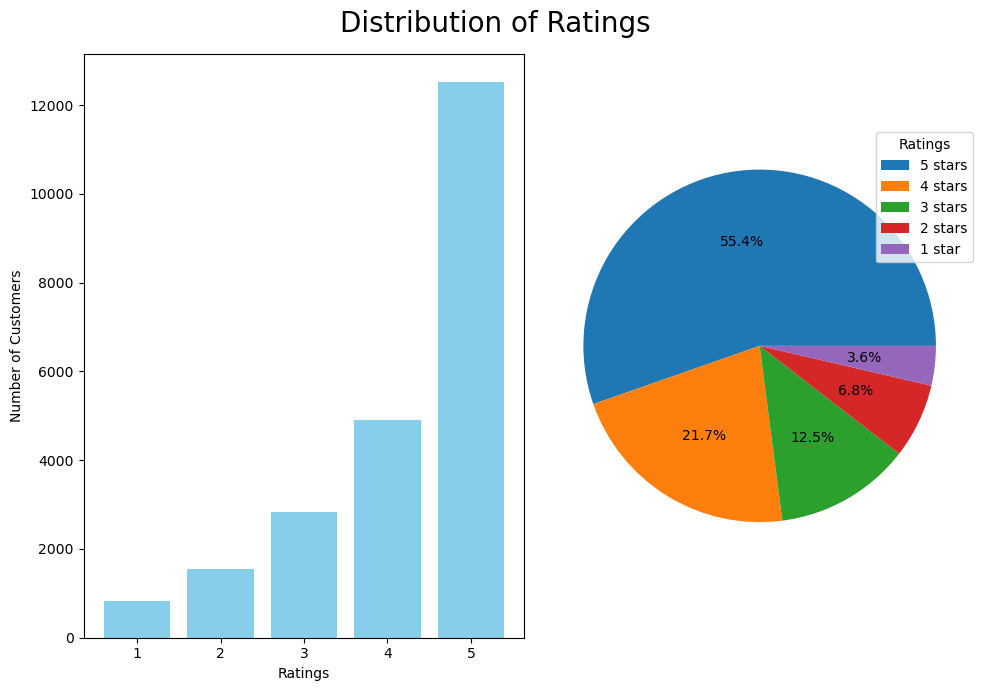

In [25]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 7))

# bar plot
ax[0].bar(rating_counts.index, rating_counts.values, color='skyblue')
ax[0].set_xlabel('Ratings')
ax[0].set_ylabel('Number of Customers')

# pie chart
pie = ax[1].pie(rating_counts, autopct='%1.1f%%')
labels = ['5 stars', '4 stars', '3 stars', '2 stars', '1 star']
ax[1].legend(pie[0], labels, title='Ratings', loc='upper right')

fig.suptitle('Distribution of Ratings', fontsize = 20)

fig.tight_layout()
plt.show()

### Word Cloud for Text column

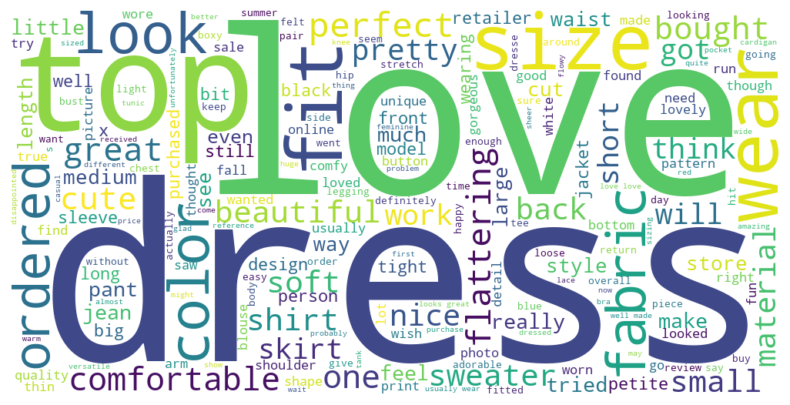

In [26]:
from wordcloud import WordCloud

review = ' '.join(df['Review'])

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(review)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Objective
To determine whether the user will recommend the product to other customers based on <b>Review</b> and <b>Recommended IND</b>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from numpy import array

import contractions

from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
data = df[['Review', 'Recommended IND']]

### Text Preprocessing

In [30]:
data['Review'].head(3)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                                                 Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  woul

In [31]:
def preprocess_text(text):
    
    # Expand contractions
    text = contractions.fix(text) # eg: converting: aren't -> are not | can't -> cannot
    
    # Convert the words into lowercase
    text = text.lower()
    
    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in lemmatized_tokens if token not in stop_words]
    
    # Join the filtered tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text

In [32]:
data = data.copy()

In [33]:
# preprocess the 'Review column'
data.loc[:, 'Preprocessed_Review'] = data['Review'].apply(preprocess_text)

In [34]:
data.head(3)

,Review,Recommended IND,Preprocessed_Review
0,Absolutely wonderful - silky and sexy and comfortable,1,absolutely wonderful silky sexy comfortable
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1,love dress sooo pretty happened find store glad never would ordered online petite bought petite love length hit little knee would definitely true midi someone truly petite
2,"Some major design flaws I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0,major design flaw high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium wa ok overall top half wa comfortable fit nicely bottom half tight layer several somewhat cheap net layer going major design flaw wa net layer sewn directly zipper c


#### Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data['Preprocessed_Review'], data['Recommended IND'], test_size=0.25, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16971,)
(5658,)
(16971,)
(5658,)


In [37]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
# print(tokenizer.word_index)

In [38]:
x_train_sequence = tokenizer.texts_to_sequences(X_train)
x_test_sequence = tokenizer.texts_to_sequences(X_test)

In [39]:
# Get max training sequence length
max_len = max([len(x) for x in x_train_sequence])
max_len

64

In [40]:
# apply sequence padding to make all the sequences of equal length
X_train = pad_sequences(x_train_sequence, maxlen=max_len)
X_test = pad_sequences(x_test_sequence, maxlen=max_len)

In [41]:
print(X_train.shape)
print(X_test.shape)

(16971, 64)
(5658, 64)


In [42]:
vocab_size = len(tokenizer.word_index)
vocab_size

11053

## RNN Model

In [43]:
# Define the model architecture

modelRNN = Sequential()
modelRNN.add(Embedding(input_dim = vocab_size + 1, output_dim = 10))
# input_dim -> total unique words in the vocabulary
# output_dim -> dimensionaility of each embedding vectors
modelRNN.add(SimpleRNN(units=150))
modelRNN.add(Dense(units=1, activation='sigmoid'))

In [45]:
# Compile the model
modelRNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the model
modelRNN.fit(X_train, y_train, epochs = 10, batch_size = 512)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7448 - loss: 0.5815
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.8241 - loss: 0.4637
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.8167 - loss: 0.4689
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.8187 - loss: 0.4516
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8229 - loss: 0.4219
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.8511 - loss: 0.3404
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.8394 - loss: 0.3589
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.8960 - loss: 0.2494
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9162 - loss: 0.2079
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9192 - loss: 0.2075


In [46]:
# Evaluate the model on test data
loss, accuracy = modelRNN.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8834 - loss: 0.2654
Test Loss: 0.2638368010520935
Test Accuracy: 0.8863555788993835


## LSTM Model

In [47]:
# Define the LSTM model architecture
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size + 1, output_dim=10))
model_lstm.add(LSTM(units=150))
model_lstm.add(Dense(units=1, activation='sigmoid'))

In [48]:
# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.7829 - loss: 0.5758
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 246ms/step - accuracy: 0.8169 - loss: 0.4317
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.8757 - loss: 0.2944
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.8944 - loss: 0.2401
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - accuracy: 0.9136 - loss: 0.2112
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 252ms/step - accuracy: 0.9239 - loss: 0.1851
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - accuracy: 0.9282 - loss: 0.1765
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 248ms/step - accuracy: 0.9365 - loss: 0.1628
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - accuracy: 0.9391 - loss: 0.1588
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 247ms/step - accuracy: 0.9415 - loss: 0.1514


In [49]:
# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9028 - loss: 0.2336
Test Loss: 0.23399612307548523
Test Accuracy: 0.9034994840621948


### Examples

In [75]:
# Define your custom sentence
custom_sentence = "This dress is comfortable and beautiful."

# Preprocess the custom sentence
preprocessed_custom_sentence = preprocess_text(custom_sentence)

# Tokenize the preprocessed sentence
custom_sequence = tokenizer.texts_to_sequences([preprocessed_custom_sentence])

# Pad the tokenized sequence
padded_custom_sequence = pad_sequences(custom_sequence, maxlen=max_len)

# Predict recommendation using the trained model
prediction = model_lstm.predict(padded_custom_sequence)

# Print the prediction
print("Probability of product being recommended:", prediction)

# Interpret the prediction
if prediction > 0.5:
    print("The product is likely to be recommended to others.")
else:
    print("The product is not likely to be recommended to others.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Probability of product being recommended: [[0.94536644]]
The product is likely to be recommended to others.


In [74]:
custom_sentence = "This dress doesnot fit well and has some design flaws."

preprocessed_custom_sentence = preprocess_text(custom_sentence)

custom_sequence = tokenizer.texts_to_sequences([preprocessed_custom_sentence])

padded_custom_sequence = pad_sequences(custom_sequence, maxlen=max_len)

prediction = model_lstm.predict(padded_custom_sequence)

print("Probability of product being recommended:", prediction)

if prediction > 0.5:
    print("The product is likely to be recommended to others.")
else:
    print("The product is not likely to be recommended to others.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Probability of product being recommended: [[0.59731996]]
The product is likely to be recommended to others.


In [73]:
custom_sentence = "Product is very bad..... doesnot fit well.....dissapointed!!"

preprocessed_custom_sentence = preprocess_text(custom_sentence)

custom_sequence = tokenizer.texts_to_sequences([preprocessed_custom_sentence])

padded_custom_sequence = pad_sequences(custom_sequence, maxlen=max_len)

prediction = model_lstm.predict(padded_custom_sequence)

print("Probability of product being recommended:", prediction)

if prediction > 0.5:
    print("The product is likely to be recommended to others.")
else:
    print("The product is not likely to be recommended to others.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Probability of product being recommended: [[0.25598797]]
The product is not likely to be recommended to others.
